<div class="alert alert-block alert-info">
    <p><b>Курс: </b>Машинное обучение и управление проектами в IT для преподавателей</p>
    <p><b>Тема: </b>5. Лрешающие деревья и сравнение моделей</p>
</div>

# Переобучение и методы борьбы с ним (5 баллов)
Переобучение --- это одна из главных проблем, с которыми сталкиваются модели машинного обучения. Эффект переобучения состоит в том, что модель, подстраиваясь под обучающую выборку, "обращает внимание" на закономерности в выборке, которые не проявляются в общем случае и имеют характер совпадения. 

Переобучение проявляется тем больше, чем больше степеней свободы имеет модель. 
### Примеры:
* Решающее дерево со слишком большой глубиной может идеально подстроиться под обучающую выборку. Параметры решающего дерева --- это решающие правила во всех вершинах (всего $\sim 2^n$ решающих правил в дереве глубины $n$).

* Алгоритм $k$ ближайших соседей подстраивается под обучаюущую выборку и может рассматриваться как эталонный пример переобучения: любой локальный шум в данных приведёт к ошибке. Параметрами Knn являются **все элементы обучающей выборки**.

* Линейный алгоритм, построенный для выборки слишком маленького размера со слишком большим количеством признаков неизбежно переобучится под обучающую выборку.

Во всех примерах мы видим, что при слишком большой сложности модели по сравнению с количеством элементов в обучающей выборке переобучение имеет место. Строго говоря, **переобучение есть всегда, когда имеет место принятие решения в условии неполных данных**, то есть всегда в машинном обучении.

### Идея 1. Оптимизация сложности модели
Чтобы нивелировать эффект переобучения, нужно поймать момент, в который качество на тестовой выборке начинает увеличиваться с ростом сложности модели. В этот момент обучение стоит останавливать.

<img src='https://drive.google.com/uc?id=1qdJDLJWPQ9T1vt2jEqWA7rHK6Ts48dyP'/>

### Идея 2: регуляризация
Суть регуляризации состоит в том, чтобы добавлять к функции потерь слагаемое, ограничивающее рост весов модели. Например, обычная версия линейной регрессии выглядит так:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} \rightarrow \min_{w}.$$

Регуляризованная версия:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \frac{1}{C}\left|\left|w\right|\right|^2\rightarrow \min_{w}.$$

Такая версия линейной регресси называется Ridge-регрессией. 

Обычная версия логрегрессии:
$$-\frac{1}{\ell}\left( \sum\limits_{y^i = 1}\ln\sigma(\langle x, w\rangle) + \sum\limits_{y^i = -1}\ln(1-\sigma(\langle x, w\rangle))\right)\rightarrow \min_{w}$$

Регуляризованная версия:

$$-\frac{1}{\ell}\left( \sum\limits_{y^i = 1}\ln\sigma(\langle x, w\rangle) + \sum\limits_{y^i = -1}\ln(1-\sigma(\langle x, w\rangle))\right) + \frac{1}{C}||w||^2\rightarrow \min_{w}$$

### Идея 3: кросс-валидация

<img src='https://drive.google.com/uc?id=1bejySBtil1f06veXPZHFmROXEVmyNVPM' width=600/>
Картинка говорит сама за себя. Чтобы получить более стабильное предсказание и точно увидеть переобучение, можно использовать кросс-валидацию.

## Переобучение многочленов
Рассмотрим задачу одномерной регрессии. Каждый объект описывается одним признаком $x$, целевая переменная --- действительное число $y$. Итак, нужно восстановить функцию $y(x)$ по нескольким значениям этой функции --- обучающей выборке.

Будем восстанавливать $y(x)$ в виде многочлена:
$$\tilde y_{a_0, \ldots, a_n}(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_1x + a_0,$$
$a_0, a_1, \ldots, a_n$ --- неизвестные параметры модели. 

Обучение такой модели заключается в минимизации средней квадратичной ошибки предсказания:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|  \tilde y_{a_0, \ldots, a_n}(x^i) - y^i \right|\right|^2}{\ell} \rightarrow\min_{a_0, a_1, \ldots, a_n}.$$

С ростом $n$ такая модель склонна к переобучению в силу увеличения количества параметров. Задание состоит в том, чтобы продемонстрировать это самое переобучение  с ростом степени многочлена. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

### Задание 1. Генерация данных (1 балл)
Сгенерируем искусственные данные из линейной зависимости с шумом, имеющим нормальное распределение.

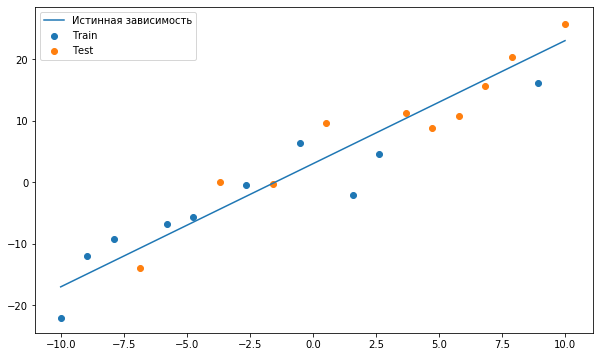

In [2]:
X = np.linspace(-10, 10, 20)

y = 2 * X + 3 + np.random.randn(20) * 3

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train, label='Train')
plt.scatter(X_test,y_test, label='Test')
plt.plot(X, 2 * X + 3, label='Истинная зависимость')
plt.legend()
plt.show()

### Задание 2. Обучение полиномиальной модели (1 балл)
Реализуйте функцию, которая принимает на вход обучающую выборку, а также степень искомого многочлена, который нужно построить. Функция возращает np.array коэффициентов искомого многочлена. Используйте функцию ``np.polyfit``.

In [3]:
def get_polynom(X, y, deg):
    return np.polyfit(x=X, y=y, deg=deg)

Реализуйте функцию, которая принимает на вход выборку ``X``, вектор правильных ответов ``y`` и многочлен ``poly``, и вычисляет значение MSE между ``poly(X)`` и ``y``.

In [4]:
from sklearn.metrics import mean_squared_error

def get_mse(X, y, poly):
    return mean_squared_error(y_true=y, y_pred=np.poly1d(poly)(X))

Протестируем функции, которые вы написали. Построим графики получившихся многочленов и вычислим средние квадратические ошибки на train и test.
### Задание 3. Заполните пропуски в построении графиков (2 балла)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


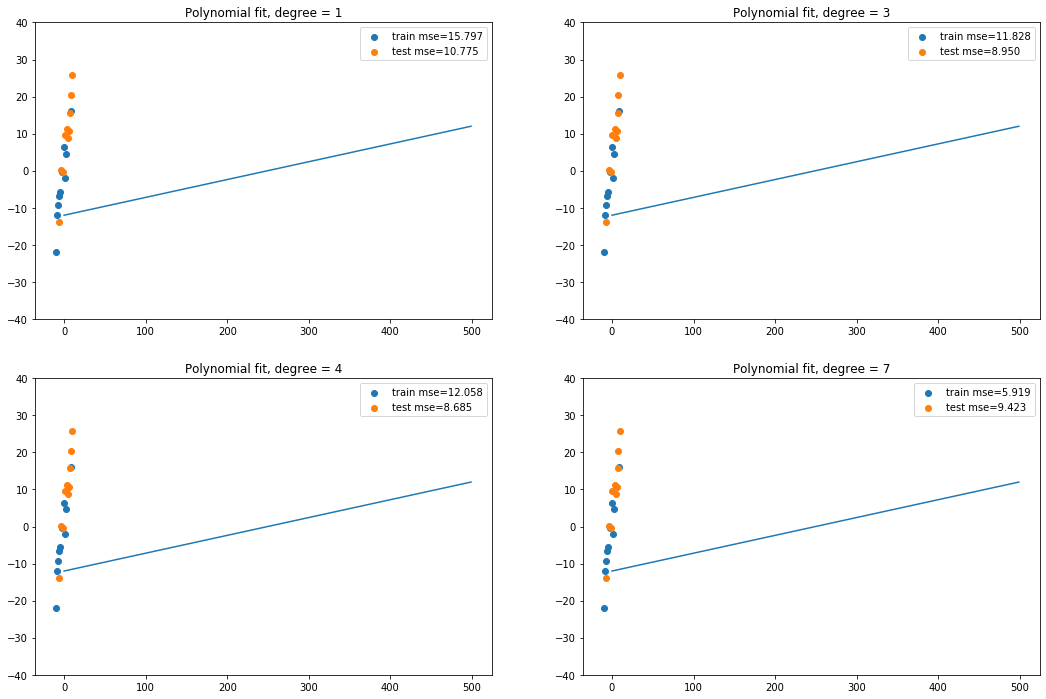

In [6]:
#сетка для отображения графика на отрезке [-12, 12] из 500 элементов
grid = np.linspace(-12, 12, 500) 

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax = ax.ravel()

for i, deg in enumerate([1,3,4,7]):
    poly = get_polynom(X, y, deg)  # Ваш код: восстановите полином по значениям X_train и y_train
    train_mse = get_mse(X_train, y_train, poly)  # Ваш код: вычислите mse на обучающей выборке
    test_mse = get_mse(X_test, y_test, poly)  # Ваш код: вычислите mse на обучающей выборке
    
    
    ax[i].scatter(X_train, y_train, 
                  label='train mse={:.3f}'.format(train_mse))
    ax[i].scatter(X_test, y_test, 
                  label='test mse={:.3f}'.format(test_mse))
    ax[i].plot(grid)  # <Ваш код: значения многочлена poly на сетке grid>
    
    
    
    ax[i].set_title('Polynomial fit, degree = ' + str(deg))
    ax[i].set_ylim(-40, 40)
    ax[i].legend()
fig.show()

### Задание 4. Выводы (1 балл)

Сделайте выводы. Имеет ли место переобучение в данной модели? Как падение качества зависит от степени многочлена?

Имеет, но с повышением степени многочлена устраняется (для 7 степени уже отсутствует)

# Композиции алгоритмов: стекинг (5 баллов)
Это домашнее задание является продолжением ноутбука, с которым мы работали на практическом занятиии по выбору модели. В этом ноутбуке вам предстоит построить композицию алгоритмов на основе стекинга.

Первую часть ноутбука с семинара мы скопировали за вас.

## Код с семинара
Обработка набора данных, выделение признаков, формирование матрицы объекты-признаки

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

df.columns = columns.split() #этот метод разделит датасет по колонкам, как в массиве columns

df = df.replace('?', np.nan)

df = df.dropna()

df['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1 (True), если зарплата больше 50K, 0 (False) иначе

In [8]:
numeric_data = df[df.columns[numeric_indices]]

categorial_data = df[df.columns[categorical_indices]]
categorial_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


### One-hot кодирование
Поскольку все алгоритмы машинного обучения, которые мы изучили, работают лишь с числовыми признаками, необходимо придумать способ обработки категориальных признаков, переводящий их в числовые. 
Одним из способов сделать это является One-hot кодирование. Его суть состоит в следующем. Пусть некоторая категориальная переменная (скажем, color) принимает $n$ различных значений (Red, Yellow, Green). Тогда можно создать $n$ новыx переменныx, соответствующих различным значениям категориального признака, каждая из которых равна 1 в том случае, если изначальный категориальный признак принимает такое значение, и 0 иначе. Принцип работы иллюстрирован на картинке.

<img src="https://drive.google.com/uc?id=1eZKwBd5dDjeraFAMV2yagZhSD6bxeWDn" style="width:600px;height:225px"/>

В Pandas One-hot кодирование выполняется функцией pd.get_dummies. Сгенерируем One-hot признаки для нашего датасета. Сохраним полную матрицу объекты признаки в переменную X.

In [9]:
dummy_features = pd.get_dummies(categorial_data)

In [10]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Выделим целевую переменную в y и вычислим процент единиц в значениях y.

In [11]:
y = df['salary']
y.mean()

0.24081695331695332

Видим, что обучающая выборка не сбалансированная. Поэтому для оценки качества предсказания метрика accuracy (процент верно угаданных лейблов) не подойдёт. Вместо этого будем использовать метрику F1-score (https://en.wikipedia.org/wiki/F1_score).

F1-score --- метрика, которая учитывает возможную разбалансировку классов при решении задачи классификации. Она вычисляется по формуле 
$${\displaystyle F_{1}=\left({\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}\right)=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}},$$

где $$\mathrm{precision} = \frac{\mathrm{True Positive}}{\mathrm{True Positive} + \mathrm{False Positive}}, \,\,\,\, \mathrm{recall} = \frac{\mathrm{True Positive}}{\mathrm{True Positive} + \mathrm{False Negative}}.$$

<img src="https://drive.google.com/uc?id=1y2t9uW5mvEdlUt6jXITbr6WW1fr8YpKS" style="width:350px;height:660px"/>

### Разбиение данных на train и test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Задание 4. Модель с семинара (0 баллов)
Воспроизведите модель с семинара, которая дала наилучшее качество (кроме бустинга). Можно просто скопировать нужный код из семинара. Не забудьте посчитать качество

## Стекинг

Идея стекинга состоит в том, чтобы обучать разнообразные алгоритмы и использовать их в качестве новых признаков объектов. 

<img src='https://drive.google.com/uc?id=14SYhjGMb_onpGV2SjJBydlPpmRRJ_xSd' width=500/>

В качестве метаалгоритма $m$, принимающего на вход в качестве признаков значения первичных моделей, можно выбирать логистическую регрессию или, скажем, решающее дерево.

Чтобы избежать переобучения, необходимо разделить обучающую выборку на n фолдов. Для предсказания ответов на k-ом фолде алгоритм обучается на оставшихся n-1 фолдах и предсказывает ответ на k-ом фолде. Такую схему обучения-предсказания реализует функция sklearn.model_selection.cross_val_predict.

In [15]:
from sklearn.model_selection import cross_val_predict

In [16]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)[:, 1]
    
    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)[:, 1]

### Задание 5. Первичные модели (2 балла)
Создайте несколько разноплановых моделей, которые в семинаре дали наилучший результат. Не забудьте, например, про логистическую регрессию, которой не было в семинаре. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = [KNeighborsClassifier(), DecisionTreeClassifier()]

Вычислим мета-признаки для созданных моделей.

In [18]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

In [19]:
for model in models:
    train, test = compute_meta_feature(model, X_train, X_test, y_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

### Задание 6. Создание метаалгоритма (1 балл)

Создайте модель для стекинга (например, логистическую регрессию или решающее дерево). Обучите модель на мета-признаках, которые вы вычислили. Предскажите целевую переменную с помощью stacking_model

In [20]:
stacking_model = #ВАШ КОД: заведите модель

#ВАШ КОД: обучите модель
'''
y_train_predicted = #ВАШ КОД
y_test_predicted = #ВАШ КОД
'''

SyntaxError: invalid syntax (<ipython-input-20-8d57fdf917b4>, line 1)

### Задание 7. Качество модели стекинга (1 балл)
Вычислите качество полученной модели и сравните его с качеством, полученным с помощью лучшей модели с семинара кроме бустинга, и с помощью бустинга.

Постарайтесь превзойти качество, полученное моделью с семинара. 

### Задание 8. Выводы (1 балл)
Опишите вашу итоговую модель стекинга и сравните результаты с другими построенными моделями.

Удалось ли с помощью стекинга побить качество, полученное на семинаре? Удалось ли превзойти градиентный бустинг?